## MNIST digits dataset - achieving 95% test-accuracy with a simple NN architecture
* Part 1 - Two ways of coding Neural Network
* Part 2 - Using Neural Network to measure accuracy on Test Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
X = np.load("nn_digits_X.npy")
y = np.load("nn_digits_y.npy")
X.shape, y.shape

((5000, 400), (5000, 1))

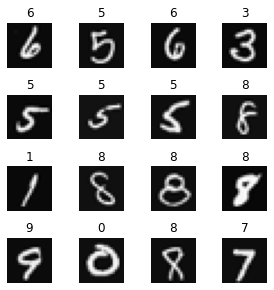

In [3]:
m, n = X.shape

fig, axes = plt.subplots(4,4, figsize=(4,4))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20,20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

# Part 1 - Two ways of coding Neural Network

## Neural Network (simpler version) - softmax activation / directly yields probabilities

In [4]:
model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='softmax'),
    ], name = "my_model" 
)                            

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
157/157 [==============================] - 0s 1ms/step - loss: 1.5267
Epoch 2/20
157/157 [==============================] - 0s 1ms/step - loss: 0.6402
Epoch 3/20
157/157 [==============================] - 0s 1ms/step - loss: 0.4536
Epoch 4/20
157/157 [==============================] - 0s 1ms/step - loss: 0.3804
Epoch 5/20
157/157 [==============================] - 0s 1ms/step - loss: 0.3358
Epoch 6/20
157/157 [==============================] - 0s 1ms/step - loss: 0.3040
Epoch 7/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2819
Epoch 8/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2587
Epoch 9/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2420
Epoch 10/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2259
Epoch 11/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2132
Epoch 12/20
157/157 [==============================] - 0s 960us/step - loss: 0.1994
Epoch 13/20
157/157 [==

In [5]:
prediction = model.predict(X)
Yhat = np.array([np.argmax(row) for row in prediction])
prediction.shape, Yhat.shape

157/157 [==============================] - 0s 870us/step


((5000, 10), (5000,))

In [6]:
prediction[0], prediction[0].sum()

(array([9.9974185e-01, 1.2973164e-06, 7.4901051e-05, 5.5514970e-06,
        5.0092330e-09, 1.1485112e-05, 2.3841139e-05, 1.6097942e-05,
        8.3972196e-07, 1.2403601e-04], dtype=float32),
 0.99999994)

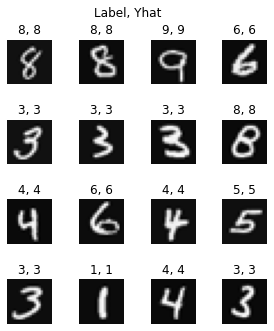

In [7]:
m, n = X.shape

fig, axes = plt.subplots(4, 4, figsize=(4, 5))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(f"{y[random_index,0]}, {Yhat[random_index]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=12)
plt.show()

## Neural Network (preferred version) - linear activation / yields logit (i.e. z)

In [8]:
model_pref = Sequential(
    [               
        tf.keras.Input(shape=(400,)),
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(10, activation='linear'),
    ], name = "my_model" 
)                            

model_pref.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model_pref.fit(
    X,y,
    epochs=20
)

Epoch 1/20
157/157 [==============================] - 0s 937us/step - loss: 1.6110
Epoch 2/20
157/157 [==============================] - 0s 902us/step - loss: 0.5959
Epoch 3/20
157/157 [==============================] - 0s 921us/step - loss: 0.3953
Epoch 4/20
157/157 [==============================] - 0s 975us/step - loss: 0.3235
Epoch 5/20
157/157 [==============================] - 0s 923us/step - loss: 0.2793
Epoch 6/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2496
Epoch 7/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2286
Epoch 8/20
157/157 [==============================] - 0s 1ms/step - loss: 0.2060
Epoch 9/20
157/157 [==============================] - 0s 1ms/step - loss: 0.1951
Epoch 10/20
157/157 [==============================] - 0s 1ms/step - loss: 0.1801
Epoch 11/20
157/157 [==============================] - 0s 1ms/step - loss: 0.1664
Epoch 12/20
157/157 [==============================] - 0s 966us/step - loss: 0.1559
Epoch 13/20
1

In [9]:
prediction_pref = model_pref.predict(X)
Yhat_pref = np.array([np.argmax(row) for row in prediction_pref])
prediction_pref.shape, Yhat_pref.shape

157/157 [==============================] - 0s 763us/step


((5000, 10), (5000,))

In [10]:
# Raw predictions/ outputs are 'z'/ logit
prediction_pref[0], prediction_pref[0].sum()

(array([  7.544208  ,  -9.118843  ,  -2.7976859 ,  -5.243777  ,
        -15.463513  ,   0.10275088,  -5.7804213 ,  -3.3551064 ,
         -6.4193177 ,  -3.9388137 ], dtype=float32),
 -44.47052)

In [11]:
# Converting to probabilities using softmax
t = np.exp(prediction_pref[0])/np.sum(np.exp(prediction_pref[0]))
t, t.sum()

(array([9.99347568e-01, 5.79489310e-08, 3.22321393e-05, 2.79232086e-06,
        1.01763042e-10, 5.86047478e-04, 1.63268953e-06, 1.84588425e-05,
        8.61855312e-07, 1.02968315e-05], dtype=float32),
 0.99999994)

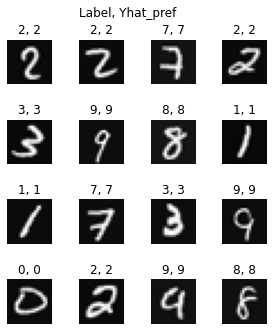

In [12]:
m, n = X.shape

fig, axes = plt.subplots(4, 4, figsize=(4, 5))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X[random_index].reshape((20, 20)).T
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(f"{y[random_index,0]}, {Yhat_pref[random_index]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat_pref", fontsize=12)
plt.show()

# Part 2 - Using Neural Network to measure accuracy on Test Set

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 400) (1500, 400) (3500, 1) (1500, 1)


In [15]:
model_pref.fit(X_train,y_train,epochs=20)

Epoch 1/20
110/110 [==============================] - 0s 983us/step - loss: 0.0916
Epoch 2/20
110/110 [==============================] - 0s 998us/step - loss: 0.0820
Epoch 3/20
110/110 [==============================] - 0s 923us/step - loss: 0.0778
Epoch 4/20
110/110 [==============================] - 0s 912us/step - loss: 0.0714
Epoch 5/20
110/110 [==============================] - 0s 955us/step - loss: 0.0671
Epoch 6/20
110/110 [==============================] - 0s 915us/step - loss: 0.0630
Epoch 7/20
110/110 [==============================] - 0s 917us/step - loss: 0.0589
Epoch 8/20
110/110 [==============================] - 0s 1ms/step - loss: 0.0545
Epoch 9/20
110/110 [==============================] - 0s 1ms/step - loss: 0.0519
Epoch 10/20
110/110 [==============================] - 0s 1ms/step - loss: 0.0487
Epoch 11/20
110/110 [==============================] - 0s 1ms/step - loss: 0.0449
Epoch 12/20
110/110 [==============================] - 0s 1ms/step - loss: 0.0419
Epoch 13/20

In [16]:
pred_test = model_pref.predict(X_test)
Yhat_test = np.array([np.argmax(row) for row in pred_test])
print(Yhat_test.shape)

47/47 [==============================] - 0s 913us/step
(1500,)


In [17]:
confusion_matrix(y_test, Yhat_test)

array([[147,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0, 136,   1,   0,   1,   0,   0,   1,   6,   1],
       [  0,   0, 159,   0,   1,   0,   0,   1,   3,   0],
       [  0,   2,   1, 144,   0,   3,   0,   1,   2,   2],
       [  0,   2,   1,   0, 139,   0,   1,   0,   0,   3],
       [  1,   0,   1,   2,   0, 160,   0,   1,   2,   0],
       [  2,   1,   0,   0,   1,   0, 146,   0,   0,   0],
       [  0,   2,   0,   1,   1,   0,   0, 124,   0,   0],
       [  0,   0,   0,   0,   1,   1,   0,   0, 146,   2],
       [  3,   0,   1,   0,   3,   0,   0,   1,   4, 134]], dtype=int64)

In [18]:
accuracy_score(y_test, Yhat_test)

0.9566666666666667